# Julia Tutorial

### Josh Day 
- GitHub: https://github.com/joshday
- email: emailjoshday@gmail.com

<br><br><br><br><br><br>

# Getting Started

How do I do X in Julia?

1. `?X`
2. Official docs
3. Discourse
4. Google

<br><br><br><br><br><br>

# Reading and Writing

Start with `?read` and `?write`

In [1]:
x = randn(10)

writecsv("temp.csv", x)

In [2]:
y = readcsv("temp.csv")

y .== x  # Adding a period means "do elementwise"

10×1 BitArray{2}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

<br><br><br><br><br><br>

# Linear Algebra
- 1-based indexing

In [65]:
x = randn(3, 3)

3×3 Array{Float64,2}:
 -0.177582   0.0439823   0.573064
 -0.325299  -1.7102     -1.14653 
  0.137406   0.0999117   0.121172

In [66]:
x[1]

-0.17758190036627933

In [67]:
x[end]

0.1211718547384241

In [69]:
x[1:2, 2:end]

2×2 Array{Float64,2}:
  0.0439823   0.573064
 -1.7102     -1.14653 

In [46]:
x * rand(3)

3-element Array{Float64,1}:
 -0.387228
  0.491642
  0.75413 

### Use BLAS directly

In [50]:
using BenchmarkTools
y = zeros(10)
x = ones(10);

In [48]:
@benchmark BLAS.axpy!(0.5, x, y)  # y = 0.5 * x + y

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     39.538 ns (0.00% GC)
  median time:      40.670 ns (0.00% GC)
  mean time:        45.446 ns (0.00% GC)
  maximum time:     161.939 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     991

In [52]:
@benchmark y[:] = 0.5 * x + y

BenchmarkTools.Trial: 
  memory estimate:  320 bytes
  allocs estimate:  2
  --------------
  minimum time:     139.468 ns (0.00% GC)
  median time:      149.618 ns (0.00% GC)
  mean time:        187.405 ns (11.21% GC)
  maximum time:     3.155 μs (92.11% GC)
  --------------
  samples:          10000
  evals/sample:     873

<br><br><br><br><br><br>

# Macros

### Functions of expressions

A macro can change an expression before it gets run.  We've already seen `@time`, etc.

Why does the following need to be a macro?

In [59]:
val = 10
@show val;

val = 10


### Turn off bounds-checking

In [62]:
x = ones(1000)

for i in eachindex(x)
    @inbounds x[i] *= 5.0
end

x[1:5]

5-element Array{Float64,1}:
 5.0
 5.0
 5.0
 5.0
 5.0

<br><br><br><br><br><br>

# Using Packages

- Install with `Pkg.add("SomePackage")`
- Package manager based on git
    - Get unreleased updates with `Pkg.checkout`
- If package is not in METADATA, you need `Pkg.clone`

In [18]:
using Distributions

Normal()

Distributions.Normal{Float64}(μ=0.0, σ=1.0)

<br><br><br><br><br><br>

# Plotting

### Plotting is not built in
- Many options
    - Plots, Gadfly, PyPlot, Winston, UnicodePlots, GR, etc.
- My suggestion is to use Plots with the GR backend

In [3]:
using Plots  # GR backend is default

In [4]:
plot(randn(100, 2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 29.2591,244.888 34.8254,291.889 40.3916,11.811 45.9578,145.37 51.524,266.304 57.0902,375.813 62.6565,315.304 68.2227,206.11 73.7889,240.232 79.3551,270.333 
 84.9213,282.416 90.4876,215.223 96.0538,202.719 101.62,272.675 107.186,98.2944 112.752,109.713 118.319,183.502 123.885,233.201 129.451,237.902 135.017,247.246 
 140.584,278.105 146.15,130.968 151.716,97.1999 157.282,205.667 162.848,162.746 168.415,181.041 173.981,174.701 179.547,218.693 185.113,220.797 190.68,204.298 
 196.246,323.39 201.812,232.836 207.378,324.713 212.944,187.848 218.511,269.601 224.077,249.634 229.643,119.128 235.209,261.245 240.776,160.259 246.342,276.179 
 251.908,213.951 257.474,136.446 263.04,285.618 268.607,100.154 274.173,258.936 279.739,137.917 285.305,298.646 290.872,183.488 296.438,148.786 302.004,284.428 
 307.57,189.788 313.136,172.987 318.703,281.73 324.269,273.917 329.835,243.767 335.401,154.867 340.967,259.01 346.534,195.803 352.1,288.313 357.666,288.293 
 363.232,242.577 368.799,231.482 374.365,151.123 379.931,219.042 385.497,123.7 391.063,139.304 396.63,190.717 402.196,136.156 407.762,169.673 413.328,264.51 
 418.895,143.846 424.461,261.412 430.027,262.097 435.593,315.467 441.159,96.0186 446.726,189.061 452.292,268.73 457.858,163.849 463.424,265.587 468.991,269.064 
 474.557,168.623 480.123,85.7357 485.689,193.116 491.255,198.83 496.822,168.16 502.388,152.801 507.954,202.972 513.52,175.29 519.087,222.328 524.653,209.116 
 530.219,335.881 535.785,77.2665 541.351,202.767 546.918,121.17 552.484,303.887 558.05,255.234 563.616,162 569.183,239.672 574.749,117.213 580.315,197.707 
 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 29.2591,153.531 34.8254,250.106 40.3916,245.446 45.9578,198.839 51.524,233.739 57.0902,210.382 62.6565,172.371 68.2227,279.646 73.7889,250.334 79.3551,268.747 
 84.9213,115.861 90.4876,269.813 96.0538,353.401 101.62,278.289 107.186,167.698 112.752,324.022 118.319,116.417 123.885,195.069 129.451,180.891 135.017,135.612 
 140.584,178.824 146.15,201.664 151.716,135.453 157.282,259.821 162.848,194.607 168.415,224.227 173.981,102.694 179.547,142.118 185.113,268.709 190.68,111.551 
 196.246,230.098 201.812,82.6205 207.378,187.437 212.944,174.189 218.511,229.063 224.077,239.287 229.643,224.312 235.209,119.692 240.776,239.05 246.342,261.207 
 251.908,268.658 257.474,146.951 263.04,24.3765 268.607,94.5695 274.173,164.053 279.739,83.645 285.305,302.279 290.872,175.164 296.438,241.79 302.004,284.286 
 307.57,182.498 313.136,320.61 318.703,102.447 324.269,153.161 329.835,216.402 335.401,200.441 340.967,201.846 346.534,211.831 352.1,170.864 357.666,213.211 
 363.232,254.8 368.799,157.401 374.365,200.963 379.931,229.235 385.497,222.61 391.063,252.584 396.63,132.833 402.196,292.63 407.762,138.773 413.328,216.212 
 418.895,211.919 424.461,166.774 430.027,165.805 435.593,55.3487 441.159,226.801 446.726,109.743 452.292,220.897 457.858,145.298 463.424,185.45 468.991,243.92 
 474.557,144.628 480.123,202.705 485.689,316.75 491.255,271.453 496.822,177.748 502.388,251.82 507.954,126.191 513.52,228.289 519.087,252.959 524.653,117.56 
 530.219,127.906 535.785,231.107 541.351,191.959 546.918,146.647 552.484,175.35 558.05,240.979 563.616,251.038 569.183,244.62 574.749,334.354 580.315,180.125 
 
 "/>
 
 
 
 
 y1 
 
 
 
 y2

### "Magic" arguments
- Even short plotting commands can do a lot
- consider `marker = (:auto, 3, .2)`
    - `:auto`: give each series a different marker
    - `3`: use a marker size of 3
    - `.2`: use an alpha (opacity) of .2

In [5]:
x = cumsum(randn(100, 4))
plt = plot(x, marker = (:auto, 3, .2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 -5 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8551,279.67 50.1062,292.625 55.3574,271.774 60.6085,267.153 65.8597,250.073 71.1108,239.557 76.362,261.445 81.6131,257.147 86.8643,264.777 92.1154,281.632 
 97.3666,276.322 102.618,264.193 107.869,266.564 113.12,249.66 118.371,246.518 123.622,243.083 128.873,237.654 134.125,224.244 139.376,251.373 144.627,268.084 
 149.878,276.464 155.129,248.113 160.38,246.737 165.632,236.078 170.883,250.153 176.134,250.338 181.385,250.952 186.636,248.202 191.887,223.161 197.138,229.109 
 202.39,227.213 207.641,213.589 212.892,209.438 218.143,199.314 223.394,201.411 228.645,198.037 233.897,210.767 239.148,200.974 244.399,207.586 249.65,210.247 
 254.901,226.207 260.152,211.818 265.403,211.47 270.655,212.749 275.906,195.276 281.157,200.512 286.408,193.951 291.659,196.984 296.91,194.535 302.161,167.966 
 307.413,159.6 312.664,166.436 317.915,157.411 323.166,125.95 328.417,121.047 333.668,125.922 338.92,114.52 344.171,98.0169 349.422,88.9847 354.673,80.4334 
 359.924,84.5616 365.175,82.6243 370.426,87.5034 375.678,77.9156 380.929,82.2631 386.18,83.8212 391.431,78.66 396.682,67.6446 401.933,38.6995 407.185,29.5255 
 412.436,22.113 417.687,25.6263 422.938,37.2122 428.189,43.4374 433.44,50.7715 438.691,51.7351 443.943,47.2812 449.194,42.9292 454.445,51.3162 459.696,70.6424 
 464.947,64.7295 470.198,78.0201 475.449,89.1916 480.701,87.9192 485.952,103.953 491.203,110.802 496.454,100.533 501.705,92.2803 506.956,62.3835 512.208,60.8206 
 517.459,60.112 522.71,50.9401 527.961,62.8093 533.212,67.2558 538.463,66.2249 543.714,68.4162 548.966,88.8922 554.217,92.7612 559.468,87.2701 564.719,113.411 
 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 44.8551,290.41 50.1062,290.193 55.3574,295.14 60.6085,291.353 65.8597,300.179 71.1108,271.127 76.362,270.768 81.6131,299.345 86.8643,277.407 92.1154,270.354 
 97.3666,249.978 102.618,256.147 107.869,240.24 113.12,233.581 118.371,228.124 123.622,208.229 128.873,224.217 134.125,218.197 139.376,219.291 144.627,208.768 
 149.878,205.742 155.129,223.041 160.38,222.16 165.632,222.429 170.883,224.689 176.134,228.74 181.385,219.04 186.636,208.986 191.887,192.407 197.138,180.511 
 202.39,160.916 207.641,149.802 212.892,144.506 218.143,126.116 223.394,137.428 228.645,140.379 233.897,157.775 239.148,146.882 244.399,163.094 249.65,165.379 
 254.901,180.963 260.152,184.91 265.403,196.707 270.655,192.653 275.906,201.207 281.157,196.117 286.408,209.979 291.659,207.64 296.91,192.644 302.161,190.193 
 307.413,188.925 312.664,196.046 317.915,189.75 323.166,186.528 328.417,199.499 333.668,207.644 338.92,196.804 344.171,188.734 349.422,165.722 354.673,154.235 
 359.924,166.526 365.175,138.252 370.426,135.153 375.678,165.661 380.929,192.375 386.18,190.115 391.431,193.948 396.682,206.504 401.933,215.949 407.185,222.607 
 412.436,204.186 417.687,196.891 422.938,199.994 428.189,220.928 433.44,221.422 438.691,233.116 443.943,212.139 449.194,213.056 454.445,198.435 459.696,202.109 
 464.947,193.807 470.198,185.54 475.449,181.277 480.701,165.403 485.952,162.789 491.203,175.495 496.454,170.506 501.705,174.141 506.956,173.028 512.208,167.781 
 517.459,172.09 522.71,199.213 527.961,208.813 533.212,223.308 538.463,220.446 543.714,214.467 548.966,206.106 

### Mutate Plots

- Since Julia passes arguments by reference, a function can change the argument in place
- By convention, *mutating* functions end in `!` and mutate at least the first argument

In [6]:
plot!(plt, x -> 10*sin(x), line = (3, :dot, .2), label = "new thing", fill = (0, .2))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
 
 100 
 
 
 -10 
 
 
 0 
 
 
 10 
 
 
 20 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 65.5019,254.157 70.4034,265.829 75.305,247.044 80.2066,242.88 85.1081,227.493 90.0097,218.018 94.9112,237.738 99.8128,233.866 104.714,240.74 109.616,255.925 
 114.517,251.141 119.419,240.214 124.321,242.35 129.222,227.12 134.124,224.29 139.025,221.195 143.927,216.304 148.828,204.222 153.73,228.663 158.632,243.719 
 163.533,251.269 168.435,225.726 173.336,224.487 178.238,214.884 183.139,227.565 188.041,227.731 192.942,228.285 197.844,225.807 202.746,203.246 207.647,208.605 
 212.549,206.897 217.45,194.622 222.352,190.882 227.253,181.761 232.155,183.651 237.057,180.611 241.958,192.08 246.86,183.257 251.761,189.214 256.663,191.612 
 261.564,205.991 266.466,193.027 271.367,192.714 276.269,193.866 281.171,178.123 286.072,182.841 290.974,176.929 295.875,179.662 300.777,177.456 305.678,153.519 
 310.58,145.981 315.482,152.14 320.383,144.009 325.285,115.664 330.186,111.247 335.088,115.64 339.989,105.367 344.891,90.4983 349.792,82.3607 354.694,74.6565 
 359.596,78.3758 364.497,76.6303 369.399,81.0261 374.3,72.3881 379.202,76.3049 384.103,77.7087 389.005,73.0587 393.907,63.1344 398.808,37.0565 403.71,28.7913 
 408.611,22.113 413.513,25.2783 418.414,35.7165 423.316,41.3251 428.217,47.9327 433.119,48.8009 438.021,44.7882 442.922,40.8673 447.824,48.4235 452.725,65.8353 
 457.627,60.5081 462.528,72.4822 467.43,82.5472 472.331,81.4008 477.233,95.846 482.135,102.017 487.036,92.7654 491.938,85.3298 496.839,58.3945 501.741,56.9864 
 506.642,56.348 511.544,48.0846 516.446,58.7781 521.347,62.7841 526.249,61.8554 531.15,63.8296 536.052,82.2774 540.953,85.7631 545.855,80.8159 550.756,104.368 
 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 65.5019,263.834 70.4034,263.638 75.305,268.095 80.2066,264.684 85.1081,272.635 90.0097,246.461 94.9112,246.138 99.8128,271.884 104.714,252.119 109.616,245.764 
 114.517,227.407 119.419,232.964 124.321,218.633 129.222,212.634 134.124,207.718 139.025,189.793 143.927,204.198 148.828,198.774 153.73,199.76 158.632,190.279 
 163.533,187.553 168.435,203.138 173.336,202.344 178.238,202.587 183.139,204.623 188.041,208.272 192.942,199.534 197.844,190.475 202.746,175.539 207.647,164.821 
 212.549,147.167 217.45,137.154 222.352,132.382 227.253,115.814 232.155,126.005 237.057,128.664 241.958,144.337 246.86,134.523 251.761,149.129 256.663,151.188 
 261.564,165.229 266.466,168.784 271.367,179.413 276.269,175.76 281.171,183.467 286.072,178.881 290.974,191.37 295.875,189.262 300.777,175.752 305.678,173.544 
 310.58,172.402 315.482,178.817 320.383,173.145 325.285,170.242 330.186,181.928 335.088,189.266 339.989,179.5 344.891,172.23 349.792,151.497 354.694,141.148 
 359.596,152.221 364.497,126.748 369.399,123.956 374.3,151.442 379.202,175.509 384.103,173.473 389.005,176.927 393.907,188.239 398.808,196.749 403.71,202.747 
 408.611,186.15 413.513,179.578 418.414,182.374 423.316,201.234 428.217,201.679 433.119,212.215 438.021,193.316 442.922,194.142 447.824,180.97 452.725,184.279 
 457.627,176.8 462.528,169.352 467.43,165.511 472.331,151.21 477.233,148.854 482.135,160.302 487.036,155.807 491.938,159.082 496.839,158.079 501.741,153.352 
 506.642,157.234 511.544,181.671 516.446,190.319 521.347,203.378 526.249,200.8 531.15,195.413 536.052,187.881 540.953,178.252 545.855,16

### Plot Recipes

- Create your own plot methods

In [7]:
using RecipesBase

struct NewType end

@recipe function f(o::NewType)
    ylim --> (0, 1)
    label --> "this is a NewType"
    color --> "red"
    rand(100)
end
    
plot(NewType())

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 20 
 
 
 40 
 
 
 60 
 
 
 80 
 
 
 100 
 
 
 0.0 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 1.0 
 
<polyline clip-path="url(#clip02)" style="stroke:#ff0000; stroke-width:1; stroke-opacity:1; fill:none" points="
 32.2221,16.2322 37.7584,24.6257 43.2947,355.032 48.831,91.8822 54.3673,155.605 59.9036,375.164 65.4399,307.197 70.9761,143.424 76.5124,46.2838 82.0487,103.748 
 87.585,119.869 93.1213,324.861 98.6576,106.403 104.194,148.962 109.73,98.6117 115.266,307.316 120.803,348.787 126.339,130.957 131.875,335.908 137.412,322.769 
 142.948,105.644 148.484,146.066 154.021,375.036 159.557,331.537 165.093,83.7814 170.629,341.82 176.166,105.602 181.702,93.6413 187.238,215.081 192.775,326.202 
 198.311,283.099 203.847,228.606 209.383,262.744 214.92,305.986 220.456,318.094 225.992,49.2637 231.529,371.44 237.065,267.195 242.601,261.957 248.137,282.956 
 253.674,69.6933 259.21,69.1872 264.746,299.392 270.283,35.0247 275.819,109.421 281.355,325.582 286.892,138.621 292.428,166.377 297.964,33.9177 303.5,135.776 
 309.037,138.419 314.573,262.674 320.109,94.6245 325.646,356.78 331.182,115.089 336.718,90.6454 342.254,185.151 347.791,55.1516 353.327,281.507 358.863,75.2541 
 364.4,261.618 369.936,179.727 375.472,177.256 381.008,116.291 386.545,193.932 392.081,190.185 397.617,90.0257 403.154,219.68 408.69,369.759 414.226,352.324 
 419.763,375.7 425.299,62.809 430.835,374.398 436.371,40.534 441.908,194.91 447.444,294.005 452.98,52.2686 458.517,260.704 464.053,338.702 469.589,338.257 
 475.125,254.022 480.662,19.9538 486.198,96.7455 491.734,189.66 497.271,114.714 502.807,92.3981 508.343,19.7158 513.879,94.5173 519.416,288.862 524.952,357.972 
 530.488,128.544 536.025,367.002 541.561,248.708 547.097,174.945 552.634,182.183 558.17,290.225 563.706,334.197 569.242,32.5789 574.779,60.3712 580.315,130.498 
 
 "/>
 
 
 
 
 this is a NewType

In [8]:
using AverageShiftedHistograms, Distributions

x = rand(Gamma(5, 1), 1_000_000)

a = ash(x; rng = 0:.1:20)

Ash
  > edges  | 0.0 : 0.1 : 20.0
  > kernel | AverageShiftedHistograms.Kernels.biweight
  > m      | 5
  > nobs   | 1000000
       ┌────────────────────────────────────────┐ 
   0.2 │⠀⠀⠀⠀⠀⠀⠀⡴⠦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⡜⠀⠀⠱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⡜⠀⠀⠀⠀⠈⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⢇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⡜⠀⠀⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⢣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⢰⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⢇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⢰⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⢀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠓⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
     0 │⣀⡜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠓⠦⠤⢄⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀│ 
       └────────────────────────────────────────┘ 
       0

In [9]:
plot(a)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:2; stroke-opacity:1; fill:none" points="
 38.8117,375.703 41.5193,375.503 44.2268,375.1 46.9343,374.346 49.6418,373.066 52.3493,371.076 55.0568,368.187 57.7643,364.247 60.4719,359.127 63.1794,352.724 
 65.8869,345.014 68.5944,335.894 71.3019,325.303 74.0094,313.347 76.717,300.246 79.4245,286.216 82.132,271.44 84.8395,256.143 87.547,240.48 90.2545,224.514 
 92.9621,208.199 95.6696,191.563 98.3771,174.914 101.085,158.493 103.792,142.464 106.5,127.143 109.207,112.763 111.915,99.3693 114.622,86.9142 117.33,75.3552 
 120.037,64.742 122.745,55.1938 125.452,46.7876 128.16,39.4065 130.867,33.0877 133.575,27.8137 136.282,23.4184 138.99,19.8741 141.697,17.2304 144.405,15.5395 
 147.112,14.7971 149.82,14.9325 152.527,15.8808 155.235,17.6907 157.942,20.4698 160.65,24.0208 163.357,28.1151 166.065,32.7363 168.773,37.8419 171.48,43.2451 
 174.188,48.9182 176.895,55.0541 179.603,61.7572 182.31,69.0158 185.018,76.7157 187.725,84.69 190.433,92.9797 193.14,101.483 195.848,109.856 198.555,117.94 
 201.263,125.807 203.97,133.538 206.678,141.408 209.385,149.599 212.093,158.042 214.8,166.675 217.508,175.348 220.215,183.813 222.923,191.947 225.63,199.694 
 228.338,206.989 231.045,213.889 233.753,220.475 236.46,226.757 239.168,232.816 241.875,238.805 244.583,244.84 247.29,250.952 249.998,257.056 252.706,262.99 
 255.413,268.7 258.121,274.172 260.828,279.398 263.536,284.369 266.243,289.072 268.951,293.522 271.658,297.752 274.366,301.835 277.073,305.787 279.781,309.536 
 282.488,313.057 285.196,316.399 287.903,319.609 290.611,322.674 293.318,325.574 296.026,328.331 298.733,330.993 301.441,333.578 304.148,336.033 306.856,338.341 
 309.563,340.542 312.271,342.64 314.978,344.625 317.686,346.468 320.393,348.185 323.101,349.809 325.808,351.356 328.516,352.841 331.223,354.278 333.931,355.66 
 336.639,356.937 339.346,358.101 342.054,359.183 344.761,360.169 347.469,361.056 350.176,361.865 352.884,362.663 355.591,363.465 358.299,364.238 361.006,364.957 
 363.714,365.641 366.421,366.297 369.129,366.901 371.836,367.476 374.544,368.035 377.251,368.574 379.959,369.092 382.666,369.576 385.374,370.018 388.081,370.417 
 390.789,370.776 393.496,371.099 396.204,371.399 398.911,371.692 401.619,371.979 404.326,372.25 407.034,372.497 409.741,372.718 412.449,372.922 415.156,373.124 
 417.864,373.341 420.572,373.565 423.279,373.775 425.987,373.941 428.694,374.044 431.402,374.109 434.109,374.158 436.817,374.216 439.524,374.308 442.232,374.433 
 444.939,374.564 447.647,374.683 450.354,374.781 453.062,374.852 455.769,374.901 458.477,374.937 461.184,374.972 463.892,375.017 466.599,375.066 469.307,375.12 
 472.014,375.182 474.722,375.244 477.429,375.299 480.137,375.341 482.844,375.373 485.552,375.402 488.259,375.426 490.967,375.454 493.674,375.489 496.382,375.527 
 499.089,375.561 501.797,375.591 504.505,375.616 507.212,375.638 509.92,375.658 512.627,375.673 515.335,375.684 518.042,375.69 520.75,375.69 523.457,375.686 
 526.165,375.687 528.872,375.695 531.58,375.708 534.287,375.724 536.995,375.738 539.702,375.745 542.41,375.746 545.117,375.742 547.825,375.738 550.532,375.741 
 553.24,375.748 555.947,375.758 558.655,375.767 561.362,375.773 564.07,375.776 566.777,375.776 569.485,375.775 572.192,375.775 574.9,375.777 577.607,375.783 
 580.315,375.79 
 "/>
 
 
 
 
 Histogram Density 
 
 
 
 Ash Density

In [10]:
plot!(x -> pdf(Gamma(5,1), x), label = "true density", fill = (0, .3))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 5 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 0.00 
 
 
 0.05 
 
 
 0.10 
 
 
 0.15 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:2; stroke-opacity:1; fill:none" points="
 38.8117,375.703 41.5193,375.503 44.2268,375.1 46.9343,374.346 49.6418,373.066 52.3493,371.076 55.0568,368.187 57.7643,364.247 60.4719,359.127 63.1794,352.724 
 65.8869,345.014 68.5944,335.894 71.3019,325.303 74.0094,313.347 76.717,300.246 79.4245,286.216 82.132,271.44 84.8395,256.143 87.547,240.48 90.2545,224.514 
 92.9621,208.199 95.6696,191.563 98.3771,174.914 101.085,158.493 103.792,142.464 106.5,127.143 109.207,112.763 111.915,99.3693 114.622,86.9142 117.33,75.3552 
 120.037,64.742 122.745,55.1938 125.452,46.7876 128.16,39.4065 130.867,33.0877 133.575,27.8137 136.282,23.4184 138.99,19.8741 141.697,17.2304 144.405,15.5395 
 147.112,14.7971 149.82,14.9325 152.527,15.8808 155.235,17.6907 157.942,20.4698 160.65,24.0208 163.357,28.1151 166.065,32.7363 168.773,37.8419 171.48,43.2451 
 174.188,48.9182 176.895,55.0541 179.603,61.7572 182.31,69.0158 185.018,76.7157 187.725,84.69 190.433,92.9797 193.14,101.483 195.848,109.856 198.555,117.94 
 201.263,125.807 203.97,133.538 206.678,141.408 209.385,149.599 212.093,158.042 214.8,166.675 217.508,175.348 220.215,183.813 222.923,191.947 225.63,199.694 
 228.338,206.989 231.045,213.889 233.753,220.475 236.46,226.757 239.168,232.816 241.875,238.805 244.583,244.84 247.29,250.952 249.998,257.056 252.706,262.99 
 255.413,268.7 258.121,274.172 260.828,279.398 263.536,284.369 266.243,289.072 268.951,293.522 271.658,297.752 274.366,301.835 277.073,305.787 279.781,309.536 
 282.488,313.057 285.196,316.399 287.903,319.609 290.611,322.674 293.318,325.574 296.026,328.331 298.733,330.993 301.441,333.578 304.148,336.033 306.856,338.341 
 309.563,340.542 312.271,342.64 314.978,344.625 317.686,346.468 320.393,348.185 323.101,349.809 325.808,351.356 328.516,352.841 331.223,354.278 333.931,355.66 
 336.639,356.937 339.346,358.101 342.054,359.183 344.761,360.169 347.469,361.056 350.176,361.865 352.884,362.663 355.591,363.465 358.299,364.238 361.006,364.957 
 363.714,365.641 366.421,366.297 369.129,366.901 371.836,367.476 374.544,368.035 377.251,368.574 379.959,369.092 382.666,369.576 385.374,370.018 388.081,370.417 
 390.789,370.776 393.496,371.099 396.204,371.399 398.911,371.692 401.619,371.979 404.326,372.25 407.034,372.497 409.741,372.718 412.449,372.922 415.156,373.124 
 417.864,373.341 420.572,373.565 423.279,373.775 425.987,373.941 428.694,374.044 431.402,374.109 434.109,374.158 436.817,374.216 439.524,374.308 442.232,374.433 
 444.939,374.564 447.647,374.683 450.354,374.781 453.062,374.852 455.769,374.901 458.477,374.937 461.184,374.972 463.892,375.017 466.599,375.066 469.307,375.12 
 472.014,375.182 474.722,375.244 477.429,375.299 480.137,375.341 482.844,375.373 485.552,375.402 488.259,375.426 490.967,375.454 493.674,375.489 496.382,375.527 
 499.089,375.561 501.797,375.591 504.505,375.616 507.212,375.638 509.92,375.658 512.627,375.673 515.335,375.684 518.042,375.69 520.75,375.69 523.457,375.686 
 526.165,375.687 528.872,375.695 531.58,375.708 534.287,375.724 536.995,375.738 539.702,375.745 542.41,375.746 545.117,375.742 547.825,375.738 550.532,375.741 
 553.24,375.748 555.947,375.758 558.655,375.767 561.362,375.773 564.07,375.776 566.777,375.776 569.485,375.775 572.192,375.775 574.9,375.777 577.607,375.783 
 580.315,375.79 
 "/>
<polygon clip-path="url(#clip02)" points="
40.1338,375.813 41.4558,

<br><br><br><br><br><br>

# Making New Types

### Julia is written in Julia
Your own types are just as powerful as those built into base Julia

### The three basic types in Julia are `abstract type`, `struct`, and `mutable struct`
- `abstract type`
    - Defines a set of types.  Doesn't actually "exist"
- `struct`
    - A collection of things that stay the same  
- `mutable struct`
    - A collection of things which may change
    

### Workflow
A struct has guarantees a mutable struct doesn't have which allows Julia to make better optimizations in many cases
- Start with `struct`
- If you hit an immutability error, use `mutable struct`

In [19]:
abstract type SumIsOne end
sum(::SumIsOne) = 1

sum (generic function with 1 method)

In [21]:
struct MyNewType <: SumIsOne
    a::Float64
    b::Vector{Int}
end

t = MyNewType(1.5, ones(Int, 5))

MyNewType(1.5, [1, 1, 1, 1, 1])

In [22]:
sum(t)

1

In [23]:
t.a

1.5

In [24]:
t.b

5-element Array{Int64,1}:
 1
 1
 1
 1
 1

In [25]:
# I can't change something that I've already said won't change
t.a = 100.0

LoadError: [91mtype MyNewType is immutable[39m

In [26]:
# Why isn't this an error?
t.b[3] = 100

100

<br><br><br><br><br><br>

# Using R with Julia

In [29]:
using RCall

In [30]:
x = randn(1000);

In [31]:
# Using R's sum function on a vector inside my Julia process
y = R"sum($x)"

RCall.RObject{RCall.RealSxp}
[1] -47.57091


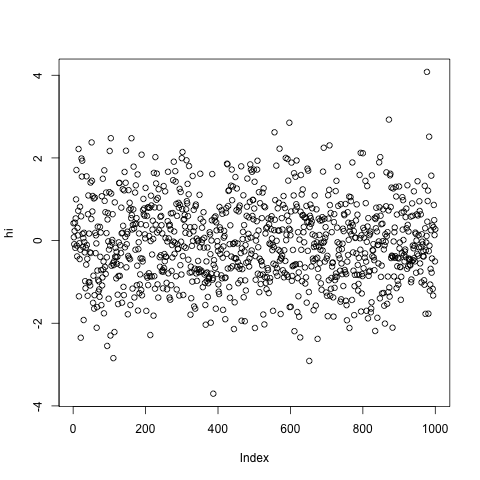

RCall.RObject{RCall.NilSxp}
NULL


In [34]:
# Use R's built-in plottingb
R"""
plot($x, ylab = "hi")
"""

In [ ]:
# Even use ggplot
R"""
library(ggplot2)
qplot($x)
"""

<br><br><br><br><br><br>

# Statistics (Do R things in Julia)

- StatsBase (common statistical functions)
- GLM (generalized linear models)
- DataFrames (tabular data with missing values)

### StatsBase

In [70]:
using StatsBase

In [37]:
sample(1:100, 5, replace=true)

5-element Array{Int64,1}:
  36
  56
  57
 100
  59

In [40]:
mean(randn(100), AnalyticWeights(rand(100)))

-0.0005036207899083502

### GLM

In [39]:
using GLM
x = randn(100, 5)
y = x * randn(5) + randn(100)

lm(x, y)

GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
      Estimate Std.Error  t value Pr(>|t|)
x1   -0.531211 0.0963626 -5.51262    <1e-6
x2    0.335702  0.111579  3.00865   0.0034
x3    0.273209  0.108739  2.51252   0.0137
x4    0.509755  0.114258  4.46144    <1e-4
x5    0.380186  0.110515  3.44012   0.0009



# DataFrames

### Missing data is a hard problem in a compiled language

- Consider `x = 5`
    - Great, the compiler knows `x` is an `Int`.
- Consider `x = 5` OR `x` is Null (in the statistical sense)
    -  Tricky.  Two ways of dealing with this:
        - `typeof(x) == Union{Int, Null}`
        - `typeof(x) == Nullable{Int}`
    - There isn't a clear null value representation winner yet (hence DataFrames and DataTables)

In [41]:
using DataFrames

In [55]:
df = DataFrame(x = randn(100), y = rand(Bool, 100))
head(df)

,x,y
1,0.4786422878697159,true
2,1.0189492462735887,false
3,1.6334919092471158,true
4,1.295935603512366,false
5,-1.4146114787077166,true
6,0.8026479892642652,true


In [56]:
using Query

df2 = @from i in df begin
    @where i.y == true && i.x > 0
    @select i
    @collect DataFrame
end
head(df2)

,x,y
1,0.4786422878697159,true
2,1.6334919092471158,true
3,0.8026479892642652,true
4,0.398824988045376,true
5,0.005791544472674803,true
6,0.15828482966825266,true
